<a href="https://colab.research.google.com/github/AguaClara/Textbook/blob/Filter_design/Baffle_K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install aguaclara

     |████████████████████████████████| 94 kB 2.1 MB/s 
     |████████████████████████████████| 209 kB 28.3 MB/s 
     |████████████████████████████████| 2.1 MB 50.4 MB/s 
     |████████████████████████████████| 109 kB 62.3 MB/s 
     |████████████████████████████████| 546 kB 57.3 MB/s 
  Created wheel for aguaclara: filename=aguaclara-0.2.10-py3-none-any.whl size=107244 sha256=16bd63e20ee629e88b09e3c15094cfc051fb03e64f0f6c5e7a47aa1930f96995
  Stored in directory: /root/.cache/pip/wheels/a3/12/ef/53d591c580e122cb62a84cb2180ddba9ba03bb3dc85b19285e
Successfully built aguaclara


In [3]:
from aguaclara.core.units import unit_registry as u
import aguaclara as ac
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

$$  K_{baffle_{min}} = \left( \frac{A_{expanded}}{A_{contracted}} -1 \right)^2 = \left( \frac{1}{\Pi_{vc}^{baffle}} -1 \right)^2$$

$$K_{baffle_{exp}} = \left(\frac{\left(1 - \Pi_{vc}^{baffle}\right) ^ 2}{ \Pi_{vc}^{baffle} \Pi_{PlaneJet_{exp}} \left(\Pi_{H_{e}S}-2\right)}\right) ^ 2$$



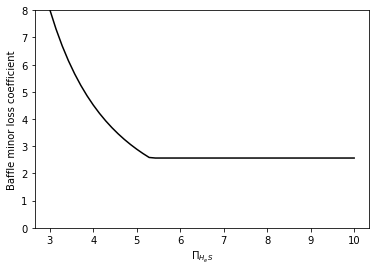

In [37]:
n_points = 50
PI_HS = np.linspace(3,10,n_points)

K = np.zeros(n_points)
K_halfjet = np.zeros(n_points)
K_shortexpansion = np.zeros(n_points)

def K_baffle(PI_HS, expansionFactor, contractionFactor):
  PI_vcBaffle = 0.62**2
  K_min = (1/PI_vcBaffle - 1)**2
  PI_jetexp = 0.116 * expansionFactor
  return max(K_min,(1 - PI_vcBaffle)**4/(PI_jetexp * PI_vcBaffle * (PI_HS - contractionFactor))**2)

for i in range(0, n_points):
    K[i] = K_baffle(PI_HS[i], 1, 0)
    K_halfjet[i] = K_baffle(PI_HS[i], 0.5, 0)
    K_shortexpansion[i] = K_baffle(PI_HS[i], 1, 2)

fig, ax = plt.subplots()
ax.plot(PI_HS, K, 'k')
#ax.plot(PI_HS, K_halfjet, 'b')
#ax.plot(PI_HS, K_shortexpansion, 'r')
ax.set(xlabel=r'$\Pi_{H_{e}S}$')
ax.set(ylabel='Baffle minor loss coefficient' )
ax.set_ylim(0,8)
#ax.legend(['base case','one sided jet expansion', 'no expansion in turns'])
#fig.savefig('Flow_Control_and_Measurement/Images/Coagulant_Viscosity')
plt.show()